## I can has CLIPS?

In [1]:
import torch
from PIL import Image
import requests
from transformers import AutoProcessor, CLIPModel
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
device='cuda'

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [4]:
def get_nltk_words():
    """Get English words from NLTK corpus"""
    try:
        import nltk
        nltk.download('words', quiet=True)
        from nltk.corpus import words
        
        word_list = words.words()
        # Filter for reasonable length and common words
        filtered_words = [word.lower() for word in word_list 
                         if 3 <= len(word) <= 15 and word.isalpha()]
        return list(set(filtered_words))  # Remove duplicates
    except ImportError:
        print("NLTK not available, trying alternative...")
        return None

def get_imagenet_classes():
    """Get ImageNet-1k class names"""
    url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
    response = requests.get(url)
    classes = response.text.strip().split('\n')
    return classes

# Option 2: CLIP's training vocabulary approximation
def get_common_objects_and_concepts():
    """Curated list of common objects, animals, concepts, emotions, etc."""
    categories = {
        'objects': [
            'chair', 'table', 'car', 'bicycle', 'bottle', 'cup', 'fork', 'knife', 'spoon',
            'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'pizza',
            'donut', 'cake', 'bed', 'toilet', 'laptop', 'mouse', 'remote', 'keyboard',
            'cell phone', 'book', 'clock', 'scissors', 'teddy bear', 'hair dryer',
            'toothbrush', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
            'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
            'skateboard', 'surfboard', 'tennis racket', 'man', 'woman'
        ],
        'animals': [
            'person', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
            'giraffe', 'bird', 'chicken', 'duck', 'eagle', 'owl', 'fish', 'shark', 'whale',
            'dolphin', 'turtle', 'frog', 'snake', 'spider', 'bee', 'butterfly', 'lion',
            'tiger', 'fox', 'wolf', 'rabbit', 'hamster', 'mouse', 'rat'
        ],
        'clothing': [
            'hat', 'cap', 'helmet', 'glasses', 'sunglasses', 'shirt', 't-shirt', 'sweater',
            'jacket', 'coat', 'dress', 'skirt', 'pants', 'jeans', 'shorts', 'shoes',
            'sneakers', 'boots', 'sandals', 'socks', 'tie', 'scarf', 'gloves', 'belt',
            'watch', 'ring', 'necklace', 'earrings', 'bracelet'
        ],
        'emotions': [
            'happy', 'sad', 'angry', 'surprised', 'excited', 'calm', 'peaceful', 'joyful',
            'melancholy', 'nostalgic', 'anxious', 'confident', 'mysterious', 'dramatic',
            'romantic', 'energetic', 'serene', 'tense', 'playful', 'serious'
        ],
        'abstract_concepts': [
            'freedom', 'justice', 'peace', 'war', 'love', 'hate', 'beauty', 'ugliness',
            'truth', 'lie', 'innovation', 'tradition', 'progress', 'chaos', 'order',
            'simplicity', 'complexity', 'elegance', 'roughness', 'sophistication'
        ],
        'colors': [
            'red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown',
            'black', 'white', 'gray', 'silver', 'gold', 'cyan', 'magenta', 'lime',
            'navy', 'maroon', 'olive', 'aqua'
        ],
        'styles': [
            'modern', 'vintage', 'classic', 'contemporary', 'abstract', 'realistic',
            'minimalist', 'ornate', 'rustic', 'elegant', 'casual', 'formal', 'artistic',
            'professional', 'creative', 'traditional', 'futuristic', 'retro'
        ],
        'activities': [
            'running', 'walking', 'jumping', 'dancing', 'singing', 'reading', 'writing',
            'cooking', 'eating', 'sleeping', 'working', 'playing', 'studying', 'exercising',
            'swimming', 'flying', 'driving', 'riding', 'climbing', 'surfing'
        ]
    }
    
    # Flatten all categories
    all_concepts = []
    for category, items in categories.items():
        if category == "objects":
            items = ['A photo of a ' + w for w in items]
        all_concepts.extend(items)
    
    return all_concepts, categories

In [5]:
# words=get_nltk_words()
words, categories=get_common_objects_and_concepts()
# words=get_imagenet_classes()

In [6]:
len(words)

208

In [7]:
# categories

In [8]:
# words = ['A photo of a ' + w for w in words]

In [1]:
# words

In [10]:
for o in words:
    if 'man' == o: 
        print(o)

In [11]:
image = Image.open('me_with_hat.jpeg')

In [12]:
image.size

(910, 930)

In [13]:
inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    image_features = model.get_image_features(**inputs)
    # Normalize the embeddings
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)

In [14]:
image_features.shape

torch.Size([1, 512])

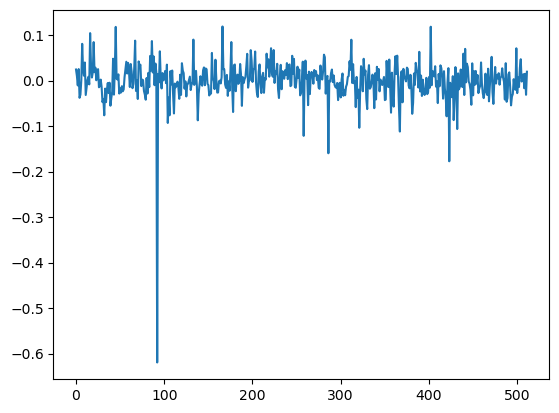

In [15]:
plt.plot(image_features.detach().cpu().numpy().ravel())

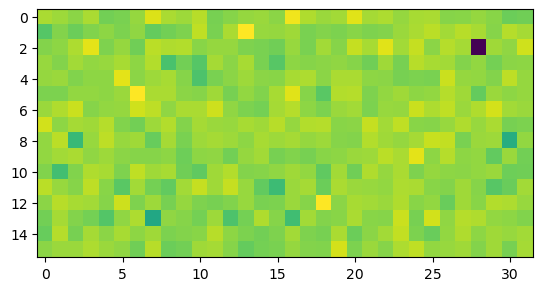

In [16]:
plt.imshow(image_features.detach().cpu().numpy().reshape(16, 32))

In [17]:
image_2 = Image.open('me_no_hat.jpeg')

In [18]:
inputs_2 = processor(images=image_2, return_tensors="pt").to(device)
with torch.no_grad():
    image_features_2 = model.get_image_features(**inputs_2)
    # Normalize the embeddings
    image_features_2 = image_features_2 / image_features_2.norm(dim=-1, keepdim=True)

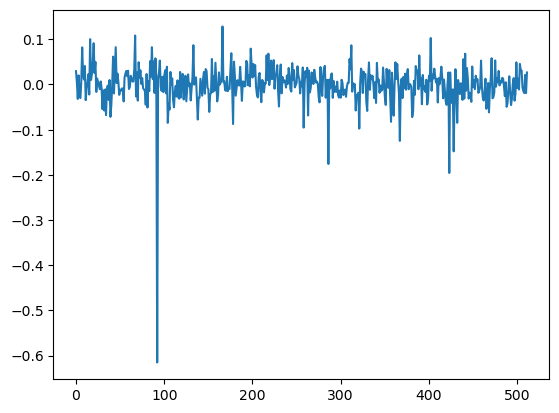

In [19]:
plt.plot(image_features_2.detach().cpu().numpy().ravel())

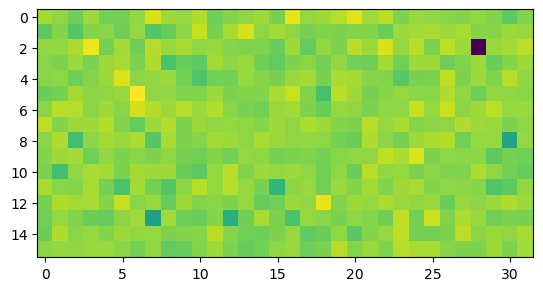

In [20]:
plt.imshow(image_features_2.detach().cpu().numpy().reshape(16, 32))

In [21]:
# words[0]

In [22]:
# words[1]

In [23]:
inputs = processor(text=words[0], return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    text_features = model.get_text_features(**inputs)
    # Normalize the embeddings
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

In [24]:
text_features.shape

torch.Size([1, 512])

Oh maybe there's a "scanning through looking for matches animation" - that could be fuuuun

In [25]:
batch_size=1024
all_text_features=[]
for i in tqdm(range(int(np.ceil(len(words)/batch_size)))):
    inputs = processor(text=words[i*batch_size:(i+1)*batch_size], return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
        # Normalize the embeddings
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)
        all_text_features.append(text_features)
all_text_features=torch.concat(all_text_features)

100%|███████████████████████████████████| 1/1 [00:00<00:00, 69.64it/s]


In [26]:
all_text_features.shape

torch.Size([208, 512])

In [27]:
similarities = torch.cosine_similarity(image_features, all_text_features, dim=1)

In [28]:
similarities = torch.cosine_similarity(image_features-image_features_2, all_text_features, dim=1)

In [29]:
similarities.shape

torch.Size([208])

In [30]:
top_k=100
top_k_indices = similarities.argsort(descending=True)[:top_k]

results = []
for idx in top_k_indices:
    results.append({
        'text': words[idx],
        'similarity': similarities[idx].item()
    })
results

[{'text': 'hat', 'similarity': 0.15776026248931885},
 {'text': 'cap', 'similarity': 0.1096150279045105},
 {'text': 'helmet', 'similarity': 0.0963720977306366},
 {'text': 'angry', 'similarity': 0.07127276062965393},
 {'text': 'serious', 'similarity': 0.0612434521317482},
 {'text': 'A photo of a frisbee', 'similarity': 0.05520292744040489},
 {'text': 'A photo of a sports ball', 'similarity': 0.0549442395567894},
 {'text': 'hate', 'similarity': 0.054674290120601654},
 {'text': 'A photo of a tennis racket', 'similarity': 0.05275862663984299},
 {'text': 'tense', 'similarity': 0.050516508519649506},
 {'text': 'A photo of a remote', 'similarity': 0.050480324774980545},
 {'text': 'mysterious', 'similarity': 0.05014066398143768},
 {'text': 'sneakers', 'similarity': 0.04935343936085701},
 {'text': 'A photo of a orange', 'similarity': 0.049343351274728775},
 {'text': 'navy', 'similarity': 0.047736551612615585},
 {'text': 'gloves', 'similarity': 0.04716985300183296},
 {'text': 'sad', 'similarity':

Ok cool cool - maybe a little bit of the reverse problem now?

In [31]:
from datasets import load_dataset

In [33]:
dataset = load_dataset(
    "imagenet-1k", 
    split=f"validation[:{1000}]",
    cache_dir='imagenet'
)

train_images_1.tar.gz:  41%|####      | 11.9G/29.3G [00:00<?, ?B/s]

train_images_2.tar.gz:   0%|          | 0.00/29.0G [00:00<?, ?B/s]

train_images_3.tar.gz:   0%|          | 0.00/29.2G [00:00<?, ?B/s]

train_images_4.tar.gz:   0%|          | 0.00/29.1G [00:00<?, ?B/s]

val_images.tar.gz:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

test_images.tar.gz:   0%|          | 0.00/13.5G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1281167 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100000 [00:00<?, ? examples/s]

In [ ]:
# dataset